In [2]:
!pip install nengo

     |████████████████████████████████| 399kB 3.1MB/s 


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.processes import WhiteSignal
from nengo.solvers import LstsqL2

In [0]:
model = nengo.Network()
with model:
    inp = nengo.Node(WhiteSignal(60, high=5), size_out=1)
    pre = nengo.Ensemble(60, dimensions=1)

    nengo.Connection(inp, pre)

    post = nengo.Ensemble(60, dimensions=1)
    
    conn = nengo.Connection(pre, post, function=lambda x: np.random.random(1))
    inp_p = nengo.Probe(inp)
    pre_p = nengo.Probe(pre, synapse=0.01)
    post_p = nengo.Probe(post, synapse=0.01)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

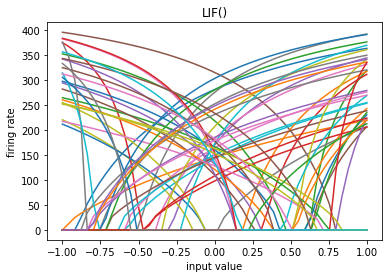

In [114]:
with nengo.Simulator(model) as sim:
    plt.figure()
    plt.plot(*nengo.utils.ensemble.tuning_curves(pre, sim))
    plt.xlabel("input value")
    plt.ylabel("firing rate")
    plt.title(str(nengo.LIF()))
    sim.run(10.0)   # 5s

In [115]:
with nengo.Simulator(model) as sim:
    sim.run(10.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

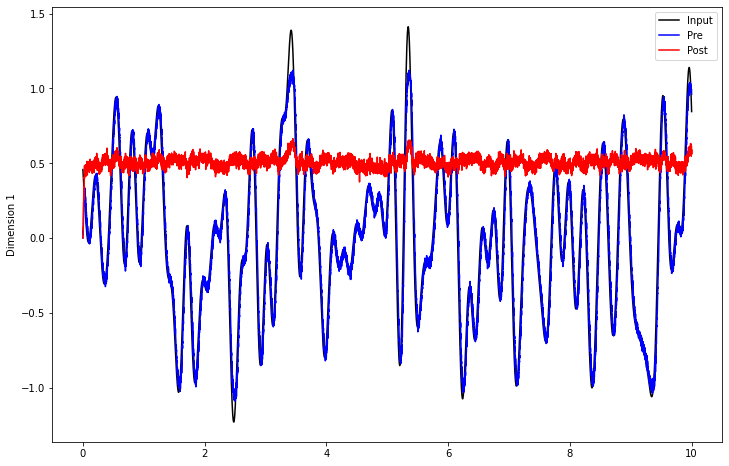

In [116]:
plt.figure(figsize=(12, 8))

plt.plot(sim.trange(), sim.data[inp_p].T[0], c='k', label='Input')
plt.plot(sim.trange(), sim.data[pre_p].T[0], c='b', label='Pre')
plt.plot(sim.trange(), sim.data[post_p].T[0], c='r', label='Post')
plt.ylabel("Dimension 1")
plt.legend(loc='best')


In [0]:
with model:
    error = nengo.Ensemble(60, dimensions=1)
    error_p = nengo.Probe(error, synapse=0.03)

    nengo.Connection(post, error)
    nengo.Connection(pre, error, transform=-1)

    conn.learning_rule_type = nengo.PES()

    nengo.Connection(error, conn.learning_rule)

In [118]:
with nengo.Simulator(model) as sim:
    sim.run(10.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

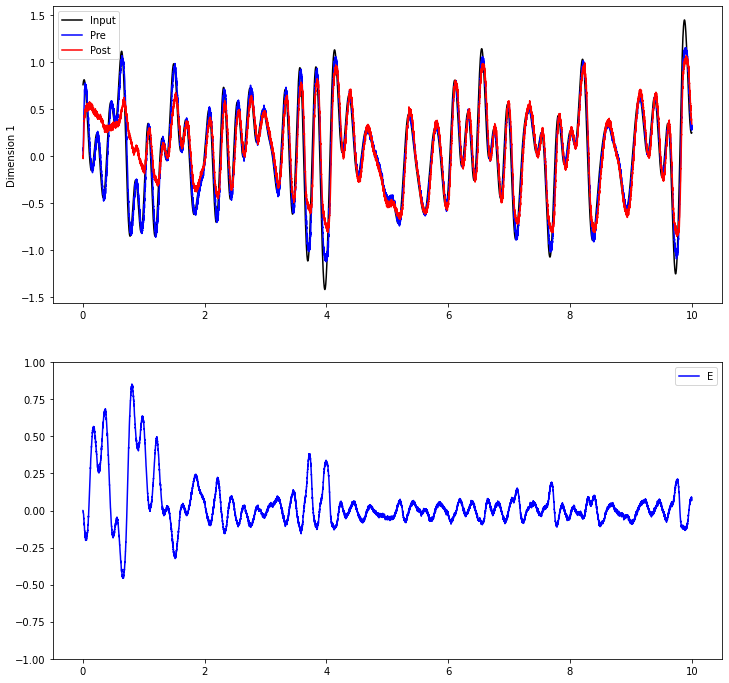

In [119]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[inp_p].T[0], c='k', label='Input')
plt.plot(sim.trange(), sim.data[pre_p].T[0], c='b', label='Pre')
plt.plot(sim.trange(), sim.data[post_p].T[0], c='r', label='Post')
plt.ylabel("Dimension 1")
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(sim.trange(), sim.data[error_p], c='b')
plt.ylim(-1, 1)
plt.legend(("Error[0]"), loc='best');

In [0]:
with model:
    weights_p = nengo.Probe(conn, 'weights', synapse=0.01, sample_every=0.01)
    conn.solver = LstsqL2(weights=True)

    

In [123]:
with nengo.Simulator(model) as sim:
    sim.run(4.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

Text(0, 0.5, 'Decoding weight')

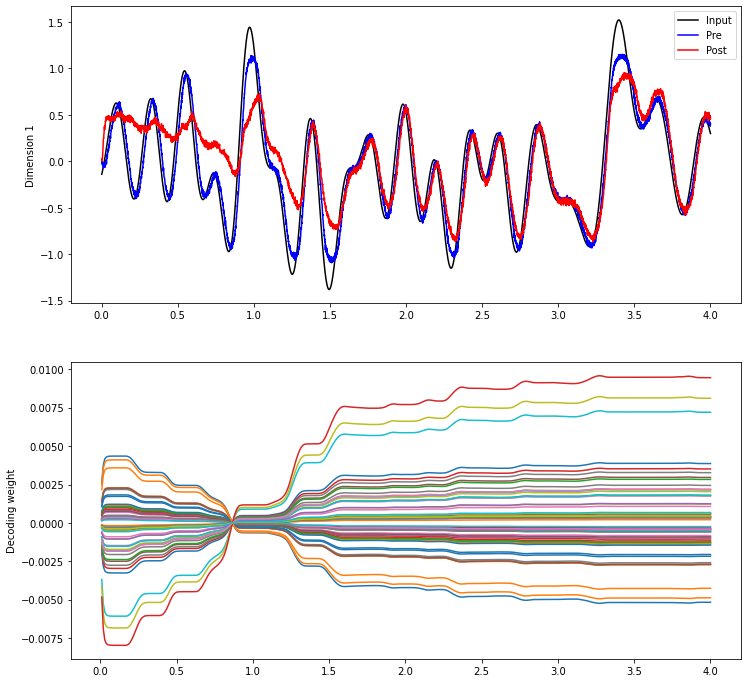

In [125]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[inp_p].T[0], c='k', label='Input')
plt.plot(sim.trange(), sim.data[pre_p].T[0], c='b', label='Pre')
plt.plot(sim.trange(), sim.data[post_p].T[0], c='r', label='Post')
plt.ylabel("Dimension 1")
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(sim.trange(sample_every=0.01), sim.data[weights_p][..., 10])
plt.ylabel("Decoding weight")
